In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# Reading companies.txt file and then converting permalink and name to ascii codes

companies = pd.read_csv('companies.txt', sep='\t', engine='python')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies['permalink'].values

array(['/Organization/-Fame', '/Organization/-Qounter',
       '/Organization/-The-One-Of-Them-Inc-', ..., '/Organization/ÁEron',
       '/Organization/ÔAsys-2',
       '/Organization/İNovatiff-Reklam-Ve-Tan�T�M-Hizmetleri-Tic'],
      dtype=object)

In [5]:
## As shown above, non-ascii code is present in permalink so converting it to ascii code
companies.loc[:, 'permalink'] = companies['permalink'].apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore').lower())

In [6]:
companies['name'].values

array(['#fame', ':Qounter', '(THE) ONE of THEM,Inc.', ..., 'ÁERON',
       'Ôasys', 'İnovatiff Reklam ve Tanıtım Hizmetleri Tic'],
      dtype=object)

In [7]:
## As shown above, non-ascii code is present in name so converting it to ascii code
companies.loc[:, 'name'] = companies['name'].apply(lambda x: str(x).encode('utf-8').decode('ascii', 'ignore').lower())

In [8]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66368,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66038,61191,27296,4,137,311,1092,5111,3978
top,/organization/mytoons,roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


## Checkpoint 1

In [9]:
# Q2 - How many unique companies are present in the companies file?
companies['permalink'].nunique()

66368

In [10]:
rounds2 = pd.read_csv('rounds2.csv', engine='python')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
rounds2['company_permalink'].values

array(['/organization/-fame', '/ORGANIZATION/-QOUNTER',
       '/organization/-qounter', ..., '/organization/�eron',
       '/ORGANIZATION/ÔASYS-2',
       '/organization/�novatiff-reklam-ve-tan�t�m-hizmetleri-tic'],
      dtype=object)

In [12]:
## As shown above, non-ascii code is present in permalink so converting it to ascii code
rounds2.loc[:, 'company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore').lower())

In [13]:
rounds2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,66368,114949,14,8,5033,NaN
top,/organization/solarflare,/funding-round/68c94643a2d939f067ca0e30b18ba1a7,venture,A,01-01-2014,NaN
freq,19,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


In [14]:
# Q1 - How many unique companies are present in rounds2?
rounds2['company_permalink'].nunique()

66368

In [15]:
# Q3 - In the companies data frame, which column can be used as the  unique key for each company?
print(companies['permalink'].nunique())
np.sort(companies['permalink'].unique())

66368


array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ..., '/organization/zzish',
       '/organization/zznode-science-and-technology-co-ltd',
       '/organization/zzzzapp-com'], dtype=object)

In [16]:
np.sort(rounds2['company_permalink'].unique())

array(['/organization/-fame', '/organization/-qounter',
       '/organization/-the-one-of-them-inc-', ..., '/organization/zzish',
       '/organization/zznode-science-and-technology-co-ltd',
       '/organization/zzzzapp-com'], dtype=object)

In [17]:
# Q4 - Are there any companies in the rounds2 file which are not  present in companies ? .
## since the number of unique items is same, matching can be done directly
##  same companies are listed in both rounds2 data and companies data

sum(np.sort(companies['permalink'].unique()) != np.sort(rounds2['company_permalink'].unique()))

0

In [18]:
# Q5 - Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.
master_frame = rounds2.merge(companies, left_on='company_permalink', right_on='permalink', how='inner')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [19]:
# Q5 - How many observations are present in master_frame ?
master_frame.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,114949,114949,114949,31140,114949,9.495900e+04,114949,114949,108815,111539,114949,106271,104003,104782,104785,94428
unique,66368,114949,14,8,5033,NaN,66368,66038,61191,27296,4,137,311,1092,5111,3978
top,/organization/solarflare,/funding-round/68c94643a2d939f067ca0e30b18ba1a7,venture,A,01-01-2014,NaN,/organization/solarflare,solarflare communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,19,1,55494,14747,779,NaN,19,19,19,8165,90153,72308,26664,19078,7422,4642
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114949 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [21]:
## Printing fraction of missing data in each column of master_frame

round(100*master_frame.isnull().sum()/len(master_frame.index), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [22]:
## There are some columns which are not required for any analysis like funding_round_code so we can drop them
## There is no way to impute state_code, region, city, homepage_url and founded_at so we can drop these columns and they are not required for any analysis
master_frame = master_frame.drop(['funding_round_code', 'state_code', 'region', 'city', 'founded_at', 'homepage_url'], axis=1)

In [23]:
## Count of NaN values for raised_amount_usd column
master_frame['raised_amount_usd'].isna().sum()

19990

In [24]:
## dropping rows where raised_amount_usd is NaN as we need to analyse data based on funding amount and no way to impure data
## also, converting raised_amount_usd to scale of Millions

master_frame = master_frame.dropna(subset=['raised_amount_usd'])
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].apply(lambda x: x/1000000)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,Media,operating,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,/organization/-qounter,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.041250,/organization/01games-technology,01games technology,Games,operating,HKG


In [25]:
## Count of NaN values for country_code column
master_frame['country_code'].isnull().sum()

5851

In [26]:
## dropping rows where country_code is NaN as we need to analyse data based on country_code

master_frame = master_frame.dropna(subset=['country_code'])
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89108 entries, 0 to 114947
Data columns (total 10 columns):
company_permalink          89108 non-null object
funding_round_permalink    89108 non-null object
funding_round_type         89108 non-null object
funded_at                  89108 non-null object
raised_amount_usd          89108 non-null float64
permalink                  89108 non-null object
name                       89108 non-null object
category_list              88529 non-null object
status                     89108 non-null object
country_code               89108 non-null object
dtypes: float64(1), object(9)
memory usage: 7.5+ MB


In [27]:
## For sector analysis, we need category_list values to map it to one of the 8 main sectors. But if category list is 
## empty, it can't be mapped so dropping rows where category_list is empty

master_frame = master_frame.dropna(subset=['category_list'])
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 10 columns):
company_permalink          88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
permalink                  88529 non-null object
name                       88529 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
dtypes: float64(1), object(9)
memory usage: 7.4+ MB


## Checkpoint 2

In [28]:
## Grouping data based on funding round type and then getting average of raised amount to know average investment
## amount for each funding round type
## Venture = 11.724223 (11.72M) so venture seems to be the most suited based on the average investment value

master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean().reset_index()

,funding_round_type,raised_amount_usd
0,angel,0.971574
1,convertible_note,1.337187
2,debt_financing,17.167653
3,equity_crowdfunding,0.509898
4,grant,4.512698
5,non_equity_assistance,0.480753
6,post_ipo_debt,169.451790
7,post_ipo_equity,66.077059
8,private_equity,73.938486
9,product_crowdfunding,1.353227


In [29]:
## Funding type we are interested in is Venture so extracting all the data for venture funding type

master_frame_venture = master_frame[master_frame['funding_round_type']=='venture']
master_frame_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491,/organization/0ndine-biomedical-inc,ondine biomedical inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000,/organization/0xdata,h2o.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000,/organization/0xdata,h2o.ai,Analytics,operating,USA


In [30]:
master_frame_venture.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
count,47809,47809,47809,47809,47809.000000,47809,47809,47809,47809,47809
unique,27332,47809,1,4347,NaN,27332,27285,9946,4,97
top,/organization/endogastric-solutions,/funding-round/76ed8d7030df8876b9789b499036b91e,venture,01-01-2008,NaN,/organization/endogastric-solutions,endogastric solutions,Biotechnology,operating,USA
freq,14,1,47809,173,NaN,14,14,5402,34996,35943
mean,NaN,NaN,NaN,NaN,11.724223,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,88.215714,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN


## Checkpoint 3

In [31]:
## Grouping by country code and summing all the raised amount and then sorting it by raised amount and get top
## 9 countries in terms of raised amount

top9 = master_frame_venture.groupby(['country_code'])['raised_amount_usd'].sum().reset_index()
top9 = top9.sort_values(['raised_amount_usd'], ascending=[False]).iloc[:9, :]
top9


,country_code,raised_amount_usd
94,USA,420068.029342
15,CHN,39338.918773
29,GBR,20072.813004
39,IND,14261.508718
12,CAN,9482.217668
28,FRA,7226.851352
42,ISR,6854.350477
21,DEU,6306.921981
45,JPN,3167.647127


In [32]:
## Check if a country is english speaking and add this information in another column of top9 data frame

def check_english(x):
    if x in ['USA', 'GBR', 'IND', 'CAN', 'ISR', '']:
        return True
    else:
        return False

top9.loc[:, 'english_speaking'] = top9['country_code'].apply(lambda x: check_english(x))
top9

,country_code,raised_amount_usd,english_speaking
94,USA,420068.029342,True
15,CHN,39338.918773,False
29,GBR,20072.813004,True
39,IND,14261.508718,True
12,CAN,9482.217668,True
28,FRA,7226.851352,False
42,ISR,6854.350477,True
21,DEU,6306.921981,False
45,JPN,3167.647127,False


In [33]:
## Get top 3 english speaking countries
## Top 3 - English speaking countries are USA, GBR, IND

top9[top9['english_speaking']==True].iloc[:3]

,country_code,raised_amount_usd,english_speaking
94,USA,420068.029342,True
29,GBR,20072.813004,True
39,IND,14261.508718,True


In [34]:
top1 = top9[top9['english_speaking']==True].iloc[:1, 0].values[0]
top2 = top9[top9['english_speaking']==True].iloc[1:2, 0].values[0]
top3 = top9[top9['english_speaking']==True].iloc[2:3, 0].values[0]
print(top1, top2, top3)

USA GBR IND


## Checkpoint 4

In [35]:
master_frame_venture['category_list'].value_counts()

Biotechnology                                                                          5402
Software                                                                               3960
Health Care                                                                            1375
Clean Technology                                                                       1268
Enterprise Software                                                                    1149
                                                                                       ... 
Education|High School Students|Internet                                                   1
3D|Enterprise Software|Games                                                              1
Big Data Analytics|Fitness|Health Care                                                    1
Industrial|Industrial Automation                                                          1
Application Platforms|Customer Support Tools|Energy Efficiency|Real Estate|Softw

In [36]:
## Extracting the primary sector from category_list by taking the first string before the vertical bar as primary sector
master_frame_venture.loc[:, 'primary_sector'] = master_frame_venture['category_list'].apply(lambda x: x.split('|')[0])

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
master_frame_venture['primary_sector'].value_counts()

Biotechnology            6794
Software                 4102
Advertising              2215
Health Care              1804
Enterprise Software      1752
                         ... 
Skill Assessment            1
GreenTech                   1
Government Innovation       1
Specialty Chemicals         1
User Interface              1
Name: primary_sector, Length: 603, dtype: int64

In [38]:
# Reading mapping file

mapping = pd.read_csv('mapping.csv', engine='python')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [39]:
## Based on the analysis of mapping data, 0 is present in many category_list items instead of na so cleaning mapping df
## Also converting non-ascii code in category_list to ascii code

def clean_category_list(x):
    if x[0] == '0':
        return x.replace('0', 'Na')
    else:
        return x.replace('0', 'na').replace('.na', '.0')

mapping['category_list'] = mapping['category_list'].apply(lambda x: str(x).encode('utf-8').decode('ascii', 'ignore'))
mapping['category_list'] = mapping['category_list'].apply(lambda x: clean_category_list(x))
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,nan,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [40]:
## Checking primary sector values in master_frame_ventures missing in mapping category list and total count of the missing data
## Verified that these values are indeed not present in mapping file

list_values = []
for value in master_frame_venture['primary_sector'].values:
    if value not in list(mapping['category_list'].values):
        list_values.append(value)
print(len(list_values))
print(np.unique(np.array(list_values)))
list_values = np.unique(np.array(list_values))

13
['Adaptive Equipment' 'Biotechnology and Semiconductor' 'English-Speaking'
 'Enterprise Hardware' 'GreenTech' 'Natural Gas Uses' 'Product Search'
 'Racing' 'Rapidly Expanding' 'Retirement' 'Specialty Retail']


In [41]:
## adding main_sector column in mapping by checking which sector category list belongs to as per the one hot encoding

def get_main_sector(x):
    return x.idxmax()

mapping.loc[:, 'main_sector'] = mapping.drop(['category_list'], axis=1).apply(lambda x: get_main_sector(x), axis=1)

In [42]:
## dropping 1 hot encoding sector data and merging master_frame_venture, mapping df on primary sector and category 
## list

master_frame_venture = master_frame_venture.merge(mapping.drop(['Automotive & Sports', 'Blanks',
                                                                'Cleantech / Semiconductors', 'Entertainment',
                                                                'Health', 'Manufacturing',
                                                                'News, Search and Messaging', 'Others',
                                                                'Social, Finance, Analytics, Advertising',
                                                               ], axis=1), left_on=['primary_sector'], 
                                                  right_on=['category_list'], how='inner', 
                                                  suffixes=('_master', '_mapping'))
master_frame_venture.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,primary_sector,category_list_mapping,main_sector
count,47796,47796,47796,47796,47796.000000,47796,47796,47796,47796,47796,47796,47796,47796
unique,27320,47796,1,4347,NaN,27320,27273,9934,4,97,592,592,8
top,/organization/endogastric-solutions,/funding-round/b3336ca54299ed3d0dd530834a57a338,venture,01-01-2008,NaN,/organization/endogastric-solutions,endogastric solutions,Biotechnology,operating,USA,Biotechnology,Biotechnology,Others
freq,14,1,47796,173,NaN,14,14,5402,34988,35933,6794,6794,11416
mean,NaN,NaN,NaN,NaN,11.721479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,88.223253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checkpoint 5

In [43]:
## Creating data frame with only USA data and where raised amount is between the range 5 mil to 15 mil
D1 = master_frame_venture[(master_frame_venture['country_code'] == top1) & (master_frame_venture['raised_amount_usd'] >= 5.0) & (master_frame_venture['raised_amount_usd'] <= 15.0)]
D1.describe(include='all')
# D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,primary_sector,category_list_mapping,main_sector
count,12063,12063,12063,12063,12063.000000,12063,12063,12063,12063,12063,12063,12063,12063
unique,8393,12063,1,3381,NaN,8393,8388,3649,4,1,419,419,8
top,/organization/airspan-networks,/funding-round/708ab8c3b144d4add069be8dae8c5724,venture,01-01-2008,NaN,/organization/airspan-networks,airspan networks,Biotechnology,operating,USA,Biotechnology,Biotechnology,Others
freq,9,1,12063,43,NaN,9,9,1147,7852,12063,1477,1477,2950
mean,NaN,NaN,NaN,NaN,8.932861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3.075861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.000971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,8.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
## groupby on main_sector to get total amount invested and count of investment in each main sector
D1_main_sector_analysis = D1[['main_sector', 'raised_amount_usd']].groupby(['main_sector']).agg(['sum', 'count']).reset_index()
D1_main_sector_analysis.columns = ['main_sector', 'total_investment_amount', 'count_investment']
D1_main_sector_analysis.head(10)

,main_sector,total_investment_amount,count_investment
0,Automotive & Sports,1454.104361,167
1,Cleantech / Semiconductors,21633.430822,2350
2,Entertainment,5099.197982,591
3,Health,8211.859357,909
4,Manufacturing,7258.553378,799
5,"News, Search and Messaging",13971.567428,1583
6,Others,26321.007002,2950
7,"Social, Finance, Analytics, Advertising",23807.376964,2714


In [45]:
## Q3-5 Top 3 Sector names (no. of investment-wise) for top1 country (C1)
## Q6-8 Number of investments in top 3 sector for top1 country (C1)

D1_main_sector_analysis.sort_values(by='count_investment', ascending=False).iloc[:3]

,main_sector,total_investment_amount,count_investment
6,Others,26321.007002,2950
7,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,Cleantech / Semiconductors,21633.430822,2350


In [46]:
## creating data frame with columns as main_sector_total_investment_amount

D1_main_sector_investment_amount = pd.DataFrame(columns=[D1_main_sector_analysis['main_sector'].values + ' Investment Amount'])
D1_main_sector_investment_amount.loc[0] = D1_main_sector_analysis['total_investment_amount'].values
# D1_main_sector_investment_amount = D1_main_sector_investment_amount.append([D1_main_sector_investment_amount]*(len(D1.index)-1), 
#                                                                           ignore_index=True)

D1_main_sector_investment_amount.head()

,Automotive & Sports Investment Amount,Cleantech / Semiconductors Investment Amount,Entertainment Investment Amount,Health Investment Amount,Manufacturing Investment Amount,"News, Search and Messaging Investment Amount",Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount"
0,1454.104361,21633.430822,5099.197982,8211.859357,7258.553378,13971.567428,26321.007002,23807.376964


In [47]:
## creating data frame with columns as main_sector_investment_count

D1_main_sector_investment_count = pd.DataFrame(columns=[D1_main_sector_analysis['main_sector'].values + ' Investment Count'])
D1_main_sector_investment_count.loc[0] = D1_main_sector_analysis['count_investment'].values
# D1_main_sector_investment_count = D1_main_sector_investment_count.append([D1_main_sector_investment_count]*(len(D1.index)-1), 
#                                                                           ignore_index=True)

D1_main_sector_investment_count.head()

,Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
0,167,2350,591,909,799,1583,2950,2714


In [48]:
## Merging D1_main_sector_investment_amount and D1_main_sector_investment_count dataframe to D1 dataframe

for column in D1_main_sector_investment_amount.columns:
    D1.loc[:, column[0]] = pd.Series(D1_main_sector_investment_amount[column].values[0], index=D1.index)
    
for column in D1_main_sector_investment_count.columns:
    D1.loc[:, column[0]] = pd.Series(D1_main_sector_investment_count[column].values[0], index=D1.index)
    
D1.head()


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,...,Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount",Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.0,/organization/all-def-digital,all def digital,Media,operating,USA,...,26321.007002,23807.376964,167,2350,591,909,799,1583,2950,2714
16,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5.0,/organization/chefs-feed,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,...,26321.007002,23807.376964,167,2350,591,909,799,1583,2950,2714
24,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5.0,/organization/huffingtonpost,the huffington post,Media|News|Publishing,acquired,USA,...,26321.007002,23807.376964,167,2350,591,909,799,1583,2950,2714
25,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5.0,/organization/huffingtonpost,the huffington post,Media|News|Publishing,acquired,USA,...,26321.007002,23807.376964,167,2350,591,909,799,1583,2950,2714
33,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10.0,/organization/matchmine,matchmine,Media|News|Reviews and Recommendations,closed,USA,...,26321.007002,23807.376964,167,2350,591,909,799,1583,2950,2714


In [49]:
D1.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,...,Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount",Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
count,12063,12063,12063,12063,12063.000000,12063,12063,12063,12063,12063,...,1.206300e+04,1.206300e+04,12063.0,12063.0,12063.0,12063.0,12063.0,12063.0,12063.0,12063.0
unique,8393,12063,1,3381,NaN,8393,8388,3649,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/organization/airspan-networks,/funding-round/708ab8c3b144d4add069be8dae8c5724,venture,01-01-2008,NaN,/organization/airspan-networks,airspan networks,Biotechnology,operating,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,1,12063,43,NaN,9,9,1147,7852,12063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.932861,NaN,NaN,NaN,NaN,NaN,...,2.632101e+04,2.380738e+04,167.0,2350.0,591.0,909.0,799.0,1583.0,2950.0,2714.0
std,NaN,NaN,NaN,NaN,3.075861,NaN,NaN,NaN,NaN,NaN,...,7.276259e-12,7.276259e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,...,2.632101e+04,2.380738e+04,167.0,2350.0,591.0,909.0,799.0,1583.0,2950.0,2714.0
25%,NaN,NaN,NaN,NaN,6.000971,NaN,NaN,NaN,NaN,NaN,...,2.632101e+04,2.380738e+04,167.0,2350.0,591.0,909.0,799.0,1583.0,2950.0,2714.0
50%,NaN,NaN,NaN,NaN,8.300000,NaN,NaN,NaN,NaN,NaN,...,2.632101e+04,2.380738e+04,167.0,2350.0,591.0,909.0,799.0,1583.0,2950.0,2714.0
75%,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,...,2.632101e+04,2.380738e+04,167.0,2350.0,591.0,909.0,799.0,1583.0,2950.0,2714.0


In [50]:
## Creating data frame with only GBR data and where raised amount is between the range 5 mil to 15 mil
D2 = master_frame_venture[(master_frame_venture['country_code'] == top2) & (master_frame_venture['raised_amount_usd'] >= 5.0) & (master_frame_venture['raised_amount_usd'] <= 15.0)]
D2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,primary_sector,category_list_mapping,main_sector
count,621,621,621,621,621.000000,621,621,621,621,621,621,621,621
unique,500,621,1,547,NaN,500,500,263,4,1,121,121,8
top,/organization/mythings,/funding-round/a2b37e17ddaf3e038a984ae021994155,venture,09-07-2014,NaN,/organization/mythings,mythings,Biotechnology,operating,GBR,Biotechnology,Biotechnology,Others
freq,4,1,621,3,NaN,4,4,60,469,621,70,70,147
mean,NaN,NaN,NaN,NaN,8.661962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.867167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.084330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,10.606760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
## groupby on main_sector to get total amount invested and count of investment in each main sector
D2_main_sector_analysis = D2[['main_sector', 'raised_amount_usd']].groupby(['main_sector']).agg(['sum', 'count']).reset_index()
D2_main_sector_analysis.columns = ['main_sector', 'total_investment_amount', 'count_investment']
D2_main_sector_analysis.head(10)

,main_sector,total_investment_amount,count_investment
0,Automotive & Sports,167.051565,16
1,Cleantech / Semiconductors,1163.990056,130
2,Entertainment,482.784687,56
3,Health,214.537510,24
4,Manufacturing,361.940335,42
5,"News, Search and Messaging",615.746235,73
6,Others,1283.624289,147
7,"Social, Finance, Analytics, Advertising",1089.404014,133


In [52]:
## Q3-5 Top 3 Sector names (no. of investment-wise) for top2 country (C2)
## Q6-8 Number of investments in top 3 sector for top2 country (C2)

D2_main_sector_analysis.sort_values(by='count_investment', ascending=False).iloc[:3]

,main_sector,total_investment_amount,count_investment
6,Others,1283.624289,147
7,"Social, Finance, Analytics, Advertising",1089.404014,133
1,Cleantech / Semiconductors,1163.990056,130


In [53]:
## creating data frame with columns as main_sector_total_investment_amount

D2_main_sector_investment_amount = pd.DataFrame(columns=[D2_main_sector_analysis['main_sector'].values + ' Investment Amount'])
D2_main_sector_investment_amount.loc[0] = D2_main_sector_analysis['total_investment_amount'].values
# D2_main_sector_investment_amount = D2_main_sector_investment_amount.append([D2_main_sector_investment_amount]*(len(D1.index)-1), 
#                                                                           ignore_index=True)

D2_main_sector_investment_amount.head()

,Automotive & Sports Investment Amount,Cleantech / Semiconductors Investment Amount,Entertainment Investment Amount,Health Investment Amount,Manufacturing Investment Amount,"News, Search and Messaging Investment Amount",Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount"
0,167.051565,1163.990056,482.784687,214.53751,361.940335,615.746235,1283.624289,1089.404014


In [54]:
## creating data frame with columns as main_sector_investment_count

D2_main_sector_investment_count = pd.DataFrame(columns=[D2_main_sector_analysis['main_sector'].values + ' Investment Count'])
D2_main_sector_investment_count.loc[0] = D2_main_sector_analysis['count_investment'].values
# D2_main_sector_investment_count = D2_main_sector_investment_count.append([D2_main_sector_investment_count]*(len(D2.index)-1), 
#                                                                           ignore_index=True)

D2_main_sector_investment_count.head()

,Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
0,16,130,56,24,42,73,147,133


In [55]:
## Merging D2_main_sector_investment_amount and D2_main_sector_investment_count dataframe to D2 dataframe

for column in D2_main_sector_investment_amount.columns:
    D2.loc[:, column[0]] = pd.Series(D2_main_sector_investment_amount[column].values[0], index=D2.index)
    
for column in D2_main_sector_investment_count.columns:
    D2.loc[:, column[0]] = pd.Series(D2_main_sector_investment_count[column].values[0], index=D2.index)
    
D2.head()


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,...,Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount",Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.000000,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,...,1283.624289,1089.404014,16,130,56,24,42,73,147,133
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.800000,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,...,1283.624289,1089.404014,16,130,56,24,42,73,147,133
133,/organization/azimo,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,11-03-2014,10.000000,/organization/azimo,azimo,Curated Web|Finance Technology|Financial Servi...,operating,GBR,...,1283.624289,1089.404014,16,130,56,24,42,73,147,133
144,/organization/basekit-platform,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,13-05-2014,7.000000,/organization/basekit-platform,basekit,Curated Web|Internet|Web Design,operating,GBR,...,1283.624289,1089.404014,16,130,56,24,42,73,147,133
145,/organization/basekit-platform,/funding-round/9ceb098a822fb971db490b23c1067336,venture,03-02-2014,6.818631,/organization/basekit-platform,basekit,Curated Web|Internet|Web Design,operating,GBR,...,1283.624289,1089.404014,16,130,56,24,42,73,147,133


In [56]:
D2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,...,Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount",Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
count,621,621,621,621,621.000000,621,621,621,621,621,...,6.210000e+02,6.210000e+02,621.0,621.0,621.0,621.0,621.0,621.0,621.0,621.0
unique,500,621,1,547,NaN,500,500,263,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/organization/mythings,/funding-round/a2b37e17ddaf3e038a984ae021994155,venture,09-07-2014,NaN,/organization/mythings,mythings,Biotechnology,operating,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,621,3,NaN,4,4,60,469,621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.661962,NaN,NaN,NaN,NaN,NaN,...,1.283624e+03,1.089404e+03,16.0,130.0,56.0,24.0,42.0,73.0,147.0,133.0
std,NaN,NaN,NaN,NaN,2.867167,NaN,NaN,NaN,NaN,NaN,...,2.275570e-13,2.275570e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,...,1.283624e+03,1.089404e+03,16.0,130.0,56.0,24.0,42.0,73.0,147.0,133.0
25%,NaN,NaN,NaN,NaN,6.084330,NaN,NaN,NaN,NaN,NaN,...,1.283624e+03,1.089404e+03,16.0,130.0,56.0,24.0,42.0,73.0,147.0,133.0
50%,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,...,1.283624e+03,1.089404e+03,16.0,130.0,56.0,24.0,42.0,73.0,147.0,133.0
75%,NaN,NaN,NaN,NaN,10.606760,NaN,NaN,NaN,NaN,NaN,...,1.283624e+03,1.089404e+03,16.0,130.0,56.0,24.0,42.0,73.0,147.0,133.0


In [57]:
## Creating data frame with only IND data and where raised amount is between the range 5 mil to 15 mil
D3 = master_frame_venture[(master_frame_venture['country_code'] == top3) & (master_frame_venture['raised_amount_usd'] >= 5.0) & (master_frame_venture['raised_amount_usd'] <= 15.0)]
D3.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,primary_sector,category_list_mapping,main_sector
count,328,328,328,328,328.000000,328,328,328,328,328,328,328,328
unique,263,328,1,293,NaN,263,263,156,4,1,90,90,8
top,/organization/manthan-systems,/funding-round/afe5584e83fea01ae9fe63ce500daa76,venture,01-01-2013,NaN,/organization/manthan-systems,manthan systems,Software,operating,IND,E-Commerce,E-Commerce,Others
freq,4,1,328,4,NaN,4,4,19,292,328,37,37,110
mean,NaN,NaN,NaN,NaN,8.992511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3.219811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,8.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,10.555000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
## groupby on main_sector to get total amount invested and count of investment in each main sector
D3_main_sector_analysis = D3[['main_sector', 'raised_amount_usd']].groupby(['main_sector']).agg(['sum', 'count']).reset_index()
D3_main_sector_analysis.columns = ['main_sector', 'total_investment_amount', 'count_investment']
D3_main_sector_analysis.head(10)

,main_sector,total_investment_amount,count_investment
0,Automotive & Sports,136.900000,13
1,Cleantech / Semiconductors,165.380000,20
2,Entertainment,280.830000,33
3,Health,167.740000,19
4,Manufacturing,200.900000,21
5,"News, Search and Messaging",433.834545,52
6,Others,1013.409507,110
7,"Social, Finance, Analytics, Advertising",550.549550,60


In [59]:
## Q3-5 Top 3 Sector names (no. of investment-wise) for top3 country (C3)
## Q6-8 Number of investments in top 3 sector for top3 country (C3)
D3_main_sector_analysis.sort_values(by='count_investment', ascending=False).iloc[:3]

,main_sector,total_investment_amount,count_investment
6,Others,1013.409507,110
7,"Social, Finance, Analytics, Advertising",550.549550,60
5,"News, Search and Messaging",433.834545,52


In [60]:
## creating data frame with columns as main_sector_total_investment_amount and main_sector_count_investment

D3_main_sector_investment_amount = pd.DataFrame(columns=[D3_main_sector_analysis['main_sector'].values + ' Investment Amount'])
D3_main_sector_investment_amount.loc[0] = D3_main_sector_analysis['total_investment_amount'].values
# D3_main_sector_investment_amount = D3_main_sector_investment_amount.append([D3_main_sector_investment_amount]*(len(D1.index)-1), 
#                                                                           ignore_index=True)

D3_main_sector_investment_amount.head()

,Automotive & Sports Investment Amount,Cleantech / Semiconductors Investment Amount,Entertainment Investment Amount,Health Investment Amount,Manufacturing Investment Amount,"News, Search and Messaging Investment Amount",Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount"
0,136.9,165.38,280.83,167.74,200.9,433.834545,1013.409507,550.54955


In [61]:
## creating data frame with columns as main_sector_investment_count

D3_main_sector_investment_count = pd.DataFrame(columns=[D3_main_sector_analysis['main_sector'].values + ' Investment Count'])
D3_main_sector_investment_count.loc[0] = D3_main_sector_analysis['count_investment'].values
# D3_main_sector_investment_count = D3_main_sector_investment_count.append([D3_main_sector_investment_count]*(len(D3.index)-1), 
#                                                                           ignore_index=True)

D3_main_sector_investment_count.head()

,Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
0,13,20,33,19,21,52,110,60


In [62]:
## Merging D3_main_sector_investment_amount and D3_main_sector_investment_count dataframe to D3 dataframe

for column in D3_main_sector_investment_amount.columns:
    D3.loc[:, column[0]] = pd.Series(D3_main_sector_investment_amount[column].values[0], index=D3.index)
    
for column in D3_main_sector_investment_count.columns:
    D3.loc[:, column[0]] = pd.Series(D3_main_sector_investment_count[column].values[0], index=D3.index)
    
D3.head()


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,...,Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount",Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00,/organization/-fame,#fame,Media,operating,IND,...,1013.409507,550.54955,13,20,33,19,21,52,110,60
135,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,28-04-2015,10.00,/organization/babajob,babajob,Curated Web|Information Technology|Services|St...,operating,IND,...,1013.409507,550.54955,13,20,33,19,21,52,110,60
159,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11.75,/organization/bharat-matrimony,bharat matrimony,Curated Web|Match-Making,operating,IND,...,1013.409507,550.54955,13,20,33,19,21,52,110,60
190,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,24-01-2012,5.00,/organization/bluestone-com,bluestone.com,Curated Web,operating,IND,...,1013.409507,550.54955,13,20,33,19,21,52,110,60
192,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,18-03-2014,10.00,/organization/bluestone-com,bluestone.com,Curated Web,operating,IND,...,1013.409507,550.54955,13,20,33,19,21,52,110,60


In [63]:
D3.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_master,status,country_code,...,Others Investment Amount,"Social, Finance, Analytics, Advertising Investment Amount",Automotive & Sports Investment Count,Cleantech / Semiconductors Investment Count,Entertainment Investment Count,Health Investment Count,Manufacturing Investment Count,"News, Search and Messaging Investment Count",Others Investment Count,"Social, Finance, Analytics, Advertising Investment Count"
count,328,328,328,328,328.000000,328,328,328,328,328,...,3.280000e+02,3.280000e+02,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0
unique,263,328,1,293,NaN,263,263,156,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/organization/manthan-systems,/funding-round/afe5584e83fea01ae9fe63ce500daa76,venture,01-01-2013,NaN,/organization/manthan-systems,manthan systems,Software,operating,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,328,4,NaN,4,4,19,292,328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.992511,NaN,NaN,NaN,NaN,NaN,...,1.013410e+03,5.505495e+02,13.0,20.0,33.0,19.0,21.0,52.0,110.0,60.0
std,NaN,NaN,NaN,NaN,3.219811,NaN,NaN,NaN,NaN,NaN,...,2.277211e-13,1.138605e-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,...,1.013410e+03,5.505495e+02,13.0,20.0,33.0,19.0,21.0,52.0,110.0,60.0
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,...,1.013410e+03,5.505495e+02,13.0,20.0,33.0,19.0,21.0,52.0,110.0,60.0
50%,NaN,NaN,NaN,NaN,8.700000,NaN,NaN,NaN,NaN,NaN,...,1.013410e+03,5.505495e+02,13.0,20.0,33.0,19.0,21.0,52.0,110.0,60.0
75%,NaN,NaN,NaN,NaN,10.555000,NaN,NaN,NaN,NaN,NaN,...,1.013410e+03,5.505495e+02,13.0,20.0,33.0,19.0,21.0,52.0,110.0,60.0


In [64]:
## Q1 - Total number of Investments (count) for top 3 countries
print(len(D1.index))
print(len(D2.index))
print(len(D3.index))

12063
621
328


In [65]:
## Q2 - Total amount of investment (USD) for top 3 countries
print(D1['raised_amount_usd'].sum())
print(D2['raised_amount_usd'].sum())
print(D3['raised_amount_usd'].sum())

107757.097294
5379.078691000001
2949.5436019999997


In [66]:
## Q9 - which company received the highest investment (in terms of count) for the top main sector in USA?
df = D1[D1['main_sector']=='Others'].groupby(['permalink'])['raised_amount_usd'].agg('count').reset_index()
df.columns = ['permalink', 'investment count']
df.sort_values(by=['investment count'], ascending=False).iloc[:5,:]

,permalink,investment count
226,/organization/black-duck-software,6
309,/organization/capella,6
1942,/organization/virtustream,6
353,/organization/change-healthcare,5
512,/organization/decarta,5


In [67]:
## Q10 - which company received the highest investment for the second best main sector in USA?
df = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['permalink'])['raised_amount_usd'].agg('count').reset_index()
df.columns = ['permalink', 'investment count']
df.sort_values(by=['investment count'], ascending=False).iloc[:5,:]


,permalink,investment count
1067,/organization/netbase,7
1430,/organization/shotspotter,7
311,/organization/choicestream,6
1147,/organization/optier,6
769,/organization/instamed,6


In [68]:
## Q9 - which company received the highest investment for the top main sector in GBR?
df = D2[D2['main_sector']=='Others'].groupby(['permalink'])['raised_amount_usd'].agg('count').reset_index()
df.columns = ['permalink', 'investment count']
df.sort_values(by=['investment count'], ascending=False).iloc[:5,:]

,permalink,investment count
35,/organization/electric-cloud,4
87,/organization/sensage,4
72,/organization/opencloud,3
36,/organization/enigmatic,3
88,/organization/silverrail-technologies,3


In [69]:
## Q-10 which company received the highest investment for the second best main sector in GBR?
df = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['permalink'])['raised_amount_usd'].agg('count').reset_index()
df.columns = ['permalink', 'investment count']
df.sort_values(by=['investment count'], ascending=False).iloc[:5,:]


,permalink,investment count
21,/organization/celltick-technologies,4
59,/organization/mythings,4
103,/organization/zopa,3
51,/organization/marketinvoice,3
41,/organization/imagini,3


In [70]:
## Q9 - which company received the highest investment for the top main sector in IND?
df = D3[D3['main_sector']=='Others'].groupby(['permalink'])['raised_amount_usd'].agg('count').reset_index()
df.columns = ['permalink', 'investment count']
df.sort_values(by=['investment count'], ascending=False).iloc[:5,:]

,permalink,investment count
48,/organization/myntra,4
60,/organization/pepperfry-com,3
27,/organization/firstcry-com,3
16,/organization/commonfloor,3
15,/organization/comat-technologies,2


In [71]:
## Q-10 which company received the highest investment for the second best main sector in IND?
df = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['permalink'])['raised_amount_usd'].agg('count').reset_index()
df.columns = ['permalink', 'investment count']
df.sort_values(by=['investment count'], ascending=False).iloc[:5,:]


,permalink,investment count
31,/organization/manthan-systems,4
28,/organization/komli-media,3
27,/organization/intarvo,2
22,/organization/grameen-financial-services,2
7,/organization/bankbazaar,2


## Checkpoint 6 - plots

In [72]:
## Plot 1

total_investment = master_frame['raised_amount_usd'].sum()

df = master_frame.groupby(['funding_round_type'])[['raised_amount_usd']].agg(['sum', 'mean']).reset_index()
df.columns = ['funding_round_type', 'total_investments_fraction', 'raised_amount_usd_mean']
df['total_investments_fraction'] = df['total_investments_fraction'].apply(lambda x: x/total_investment)
df = df[df['funding_round_type'].isin(['venture', 'seed', 'private_equity', 'angel'])]
df.head()

,funding_round_type,total_investments_fraction,raised_amount_usd_mean
0,angel,0.004610,0.971574
8,private_equity,0.145128,73.938486
11,seed,0.017013,0.747794
13,venture,0.604508,11.724223


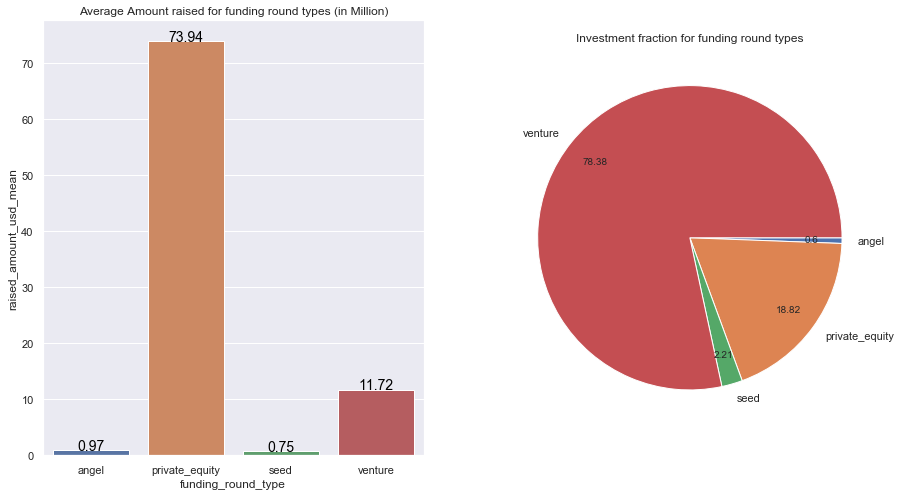

In [73]:
def absolute_value(val):
    return round(val, 2)

plt.figure(figsize=(15, 8))

plt.subplot(121)
plot = sns.barplot(x='funding_round_type', y='raised_amount_usd_mean', data=df)
plt.title('Average Amount raised for funding round types (in Million)')
plt.subplot(122), plt.pie(100*df['total_investments_fraction'].values, labels= df['funding_round_type'].values, autopct=absolute_value, counterclock=False, pctdistance=0.8)   #sns.barplot(x='funding_round_type', y='total_investments_fraction', data=df)
plt.title('Investment fraction for funding round types')

count = 0
for index, row in df.iterrows():
    plot.text(count, row.raised_amount_usd_mean ,round(row.raised_amount_usd_mean, 2), color='black', ha="center", fontsize=14)
    count += 1

plt.show()

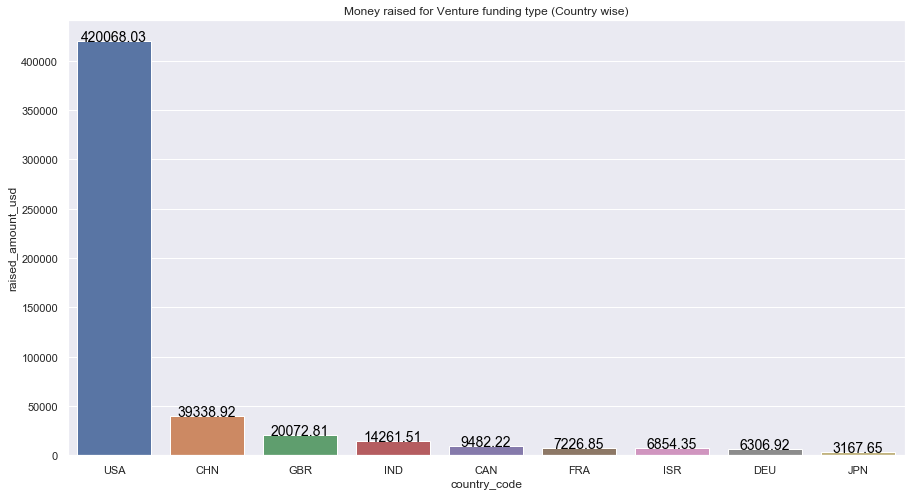

In [74]:
## Plot 2

plt.figure(figsize=(15, 8))

plot = sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
plt.title('Money raised for Venture funding type (Country wise)')

count = 0
for index, row in top9.iterrows():
    plot.text(count, row.raised_amount_usd ,round(row.raised_amount_usd, 2), color='black', ha="center", fontsize=14)
    count += 1

plt.show()

In [81]:
## Plot 3
## In the problem statement, it is not mentioned that the funding range is between 5M to 15M so below plot is for that

df = master_frame_venture[(master_frame_venture['country_code'].isin([top1, top2, top3]))]
df = df.groupby(['country_code', 'main_sector'])['raised_amount_usd'].count().reset_index()
df.columns = ['country_code', 'main_sector', 'investment_count']
df = df.sort_values(['investment_count'], ascending=[False]).groupby(['country_code']).head(3)
df.head(50)


,country_code,main_sector,investment_count
22,USA,Others,8314
17,USA,Cleantech / Semiconductors,7996
23,USA,"Social, Finance, Analytics, Advertising",7246
6,GBR,Others,516
1,GBR,Cleantech / Semiconductors,442
7,GBR,"Social, Finance, Analytics, Advertising",421
14,IND,Others,284
15,IND,"Social, Finance, Analytics, Advertising",147
13,IND,"News, Search and Messaging",130


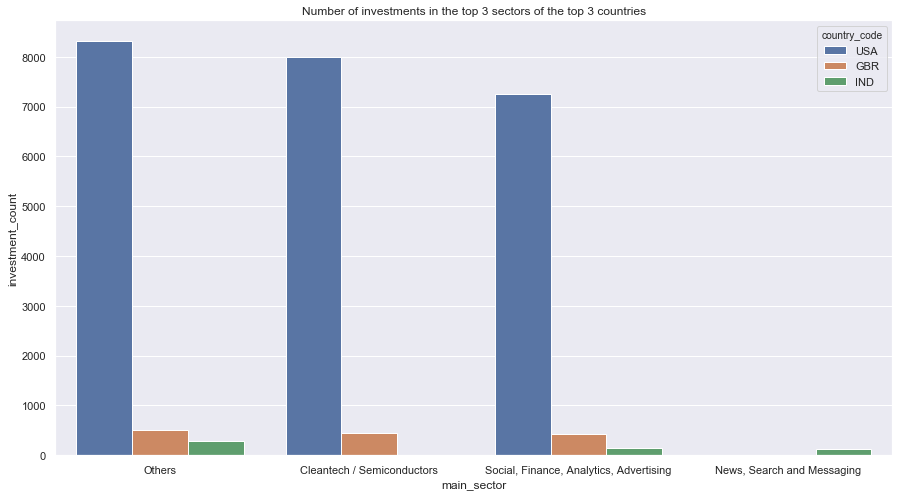

In [82]:
plt.figure(figsize=(15, 8))

sns.barplot(x='main_sector', y='investment_count', hue='country_code', data=df)
plt.title('Number of investments in the top 3 sectors of the top 3 countries')
plt.show()

In [83]:
## Plot 3
## Assuming that the funding amount is between 5 to 15 Million USD 

df = master_frame_venture[(master_frame_venture['country_code'].isin([top1, top2, top3])) & 
                           (master_frame_venture['raised_amount_usd'] >= 5.0) & 
                           (master_frame_venture['raised_amount_usd'] <= 15.0)]
df = df.groupby(['country_code', 'main_sector'])['raised_amount_usd'].count().reset_index()
df.columns = ['country_code', 'main_sector', 'investment_count']
df = df.sort_values(['investment_count'], ascending=[False]).groupby(['country_code']).head(3)
df.head(50)

,country_code,main_sector,investment_count
22,USA,Others,2950
23,USA,"Social, Finance, Analytics, Advertising",2714
17,USA,Cleantech / Semiconductors,2350
6,GBR,Others,147
7,GBR,"Social, Finance, Analytics, Advertising",133
1,GBR,Cleantech / Semiconductors,130
14,IND,Others,110
15,IND,"Social, Finance, Analytics, Advertising",60
13,IND,"News, Search and Messaging",52


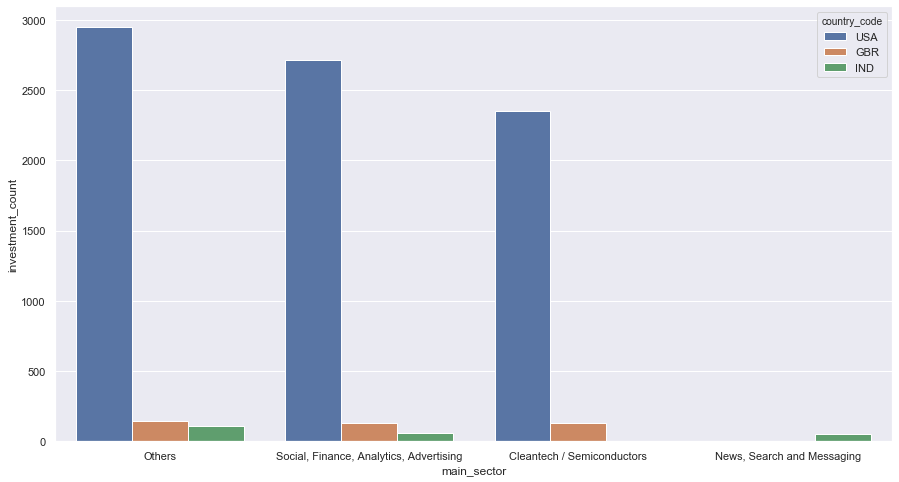

In [84]:
plt.figure(figsize=(15, 8))

sns.barplot(x='main_sector', y='investment_count', hue='country_code', data=df)
plt.show()